In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df=pd.read_csv('subway.csv',encoding='cp949')
df = df.replace(',','',regex=True)
df.shape

df.head()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
0,2019-05,1호선,150,서울역,1568570,1489737,247801,242107,2019-06-03 10:56:20
1,2019-05,1호선,151,시청,709821,727110,112279,112016,2019-06-03 10:56:20
2,2019-05,1호선,152,종각,1204910,1151371,176083,164915,2019-06-03 10:56:20
3,2019-05,1호선,153,종로3가,699000,647664,408682,382809,2019-06-03 10:56:20
4,2019-05,1호선,154,종로5가,561662,578374,307515,295535,2019-06-03 10:56:20


In [20]:
arr = np.array(df)
arr.shape, arr[0]

((597, 9), array(['2019-05', '1호선', 150, '서울역', '1568570', '1489737', '247801',
        '242107', '2019-06-03 10:56:20'], dtype=object))

In [23]:
#유임승차
유임승차=arr[:,4].astype(np.int)
np.max(유임승차),np.argmax(유임승차),arr[np.argmax(유임승차),1:4:2]

(2894341, 31, array(['2호선', '강남'], dtype=object))

In [24]:
#유임승차 비율이 가증 높은곳은? 유임승차/무임승차
무임승차=arr[:,6].astype(np.int)
np.max(무임승차),np.argmax(무임승차),arr[np.argmax(무임승차),1:4:2]

(408682, 3, array(['1호선', '종로3가'], dtype=object))

In [28]:
유임승차비율=유임승차/(무임승차+1)
np.min(유임승차비율), np.argmin(유임승차비율), arr[np.argmax(유임승차비율),1:4:2]

(0.6213296934783543, 208, array(['분당선', '복정'], dtype=object))

In [34]:
#무임승차가 제일 많은 역
전체승하차인원=arr[:,6:8].astype(np.int)

In [35]:
역이용인원=np.sum(전체승하차인원,axis=1)
np.max(역이용인원),np.argmax(역이용인원),arr[np.argmax(역이용인원),1:4:2]

(791491, 3, array(['1호선', '종로3가'], dtype=object))

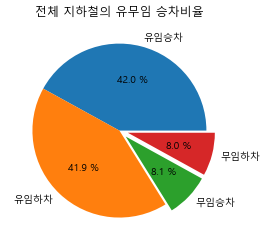

In [42]:
#모든 역의 유무임 승하차 비율은 어껗게 될까 > 파이(유임승차 45%, 무임하차x)
a=np.sum(arr[:,4:8].astype(np.int),axis=0)
plt.title('전체 지하철의 유무임 승차비율')
plt.rc('font',family='Malgun Gothic')
n=plt.pie(a, autopct='%.1f %%', labels=df.columns[4:8], explode=[0,0,0.1,0.1])
plt.savefig('subway_ratio.png')

In [52]:
for i in range(len(arr)):
    row = arr[i]
    승하차인원 = row[4:8].astype(np.int)
    유임승차 = 승하차인원[0]
    if 유임승차 > 1000000:
        print(row)
        plt.rc('font',family='Malgun Gothic')
        plt.title('전체 지하철의 유무임 승차비율')
        n=plt.pie(row[4:8], autopct='%.1f %%', labels=df.columns[4:8], explode=[0,0,0.1,0.1])
        역이름=row[3]
        파일명='subway_'+역이름+'.png'
        plt.title(역이름+'의 유무임 승차비율')
        plt.savefig(파일명)
        plt.close()

['2019-05' '1호선' 150 '서울역' '1568570' '1489737' '247801' '242107'
 '2019-06-03 10:56:20']
['2019-05' '1호선' 152 '종각' '1204910' '1151371' '176083' '164915'
 '2019-06-03 10:56:20']
['2019-05' '2호선' 202 '을지로입구' '1458984' '1462646' '122625' '113191'
 '2019-06-03 10:56:20']
['2019-05' '2호선' 212 '건대입구' '1378810' '1494957' '105074' '109681'
 '2019-06-03 10:56:20']
['2019-05' '2호선' 214 '강변(동서울터미널)' '1310416' '1289645' '160160' '155742'
 '2019-06-03 10:56:20']
['2019-05' '2호선' 216 '잠실(송파구청)' '2539574' '2462479' '233044' '219947'
 '2019-06-03 10:56:20']
['2019-05' '2호선' 219 '삼성(무역센터)' '1781824' '1842623' '134802' '127716'
 '2019-06-03 10:56:20']
['2019-05' '2호선' 220 '선릉' '1460528' '1300444' '234778' '207100'
 '2019-06-03 10:56:20']
['2019-05' '2호선' 221 '역삼' '1269095' '1438098' '174383' '177850'
 '2019-06-03 10:56:20']
['2019-05' '2호선' 222 '강남' '2894341' '2974378' '192979' '172755'
 '2019-06-03 10:56:20']
['2019-05' '2호선' 226 '사당' '1171893' '1316118' '229867' '219309'
 '2019-06-03 10:56:20']
['2019